Clothing Recommendation system Project
By:Pranali Jamdade, Swamini Sontakke, Yutika Vora


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing all the necessary packages.

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [ ]:
# Loading the data using pandas' read_json function...
data = pd.read_json('/content/drive/MyDrive/tops_fashion.json')

# Getting the number of rows and columns in the dataframe...
print("No. of data points :", data.shape[0], "No. of features/variables :", data.shape[1])

No. of data points : 183138 No. of features/variables : 19


In [ ]:
# Printing the features in the dataframe...
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

In [ ]:
# Using only 7 features and discarding remaining 12 from the dataframe...
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

# Again getting the number of rows and columns in the dataframe...
print("No. of data points :", data.shape[0], "No. of features/variables :", data.shape[1])

No. of data points : 183138 No. of features/variables : 7


In [ ]:
#Let's check the data once...
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


**LETS TAKE A LOOK AT SOME OF THE STATISTICS**

**CHECKING FOR PRODUCT_TYPE _NAME**

In [ ]:
print(data['product_type_name'].describe())


count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


We have total 72 unique type of product_type_names.

91.62% ( 167794/183138 ) of the products are shirts.

In [ ]:
# names of different product types
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [ ]:
from collections import Counter

# find the 10 most frequent product_type_names.
product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

**CHECKING FOR BRAND OF PRODUCT**

In [ ]:
print(data['brand'].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


There are 10577 unique brands.

( 183138 - 182987 ) 151 missing values.

In [ ]:
# find the 10 most frequent brand.
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

**CHECKING FOR COLOR OF PRODUCT**

In [ ]:
print(data['color'].describe())

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


we have 7380 unique colors.
7.2% of products are black in color.

64956 of 183138 products have color information. That's approx 35.4%.

In [ ]:
# find the 10 most frequent color.
color_count = Counter(list(data['color']))
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

**CHECKING FOR FORMATTED PRICE OF THE PRODUCT**

In [ ]:
print(data['formatted_price'].describe())

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


Only 28,395 (15.5% of whole data) products with price information.

In [ ]:
price_count = Counter(list(data['formatted_price']))
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

Only 15.5% of whole products with price information, others are 'None'

**CHECKING FOR TITLE OF THE PRODUCT**

In [ ]:
print(data['title'].describe())

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object



All of the products have a title.
Titles are fairly descriptive of what the product is.
We will use titles extensively in this project as they are short and informative.
By watching the 'count', we can say that 'title' feature is available for most items. This makes it most important feature too

**CHECKING FOR NULL VALUES**

In [ ]:
data.isnull().sum()

asin                      0
brand                   151
color                118182
medium_image_url          0
product_type_name         0
title                     0
formatted_price      154743
dtype: int64

In [ ]:
#consider products which have price information, data['formatted_price'].isnull() => gives the information 
# about the dataframe row's which have null values price == None|Null
data = data.loc[~data['formatted_price'].isnull()]
#This will store those values whose 'formatted_price' is not null
print('Number of data points After eliminating price = NULL :', data.shape[0])
# consider products which have color information
# data['color'].isnull() => gives the information about the dataframe row's which have null values price == None|Null
data =data.loc[~data['color'].isnull()]
print('Number of data points After eliminating color = NULL :', data.shape[0])

Number of data points After eliminating price = NULL : 28395
Number of data points After eliminating color = NULL : 28385


**We brought down the number of data points from 183K to 28K**



In [ ]:
#Finding the number of products which have exactly the same title...
print(sum(data.duplicated('title')))

2325


In [ ]:
#If title has very few words, its of little use, so let's remove them...
data_sorted = data[data['title'].apply(lambda x: len(x.split()) > 4)]
print("After removal of short titles: ", data_sorted.shape[0])

After removal of short titles:  27949


Some examples of dupliacte titles that differ only in the last few words.
Titles 1:
16. woman's place is in the house and the senate shirts for Womens XXL White
17. woman's place is in the house and the senate shirts for Womens M Grey

Title 2:
25. tokidoki The Queen of Diamonds Women's Shirt X-Large
26. tokidoki The Queen of Diamonds Women's Shirt Small
27. tokidoki The Queen of Diamonds Women's Shirt Large


In [ ]:
#Sorting data according to title in alphbetical order...
data_sorted.  sort_values('title', inplace = True)
data_sorted.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
118987,B008D30AGK,Out+of+Print+Clothing,Multicolored,https://images-na.ssl-images-amazon.com/images...,SHIRT,"""1984"" Retro Book Cover Women's SLim Fit T-Shi...",$7.51
78827,B003IDE8XQ,Maggie's Organics,Grey,https://images-na.ssl-images-amazon.com/images...,HOME,"""Camisoles Grey - Medium Fair Labor, 1 pc""",$18.99
109599,B00KI3VDXM,Crazy4Bling,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,"""I Wanna Be Adored"" Long Sleeve Top with Shred...",$39.99
40451,B073SKNQHD,The Workout Princess,Premium Heather Gray,https://images-na.ssl-images-amazon.com/images...,SHIRT,"""I Workout To Burn off The Crazy"", Tri Blend T...",$24.99
12050,B06WRW8RQ1,AJ,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,"""Life is a Journey"" Self-Help DIY T-Shirt (Wom...",$9.38


**Removing Most Similar Duplicates**

In [ ]:
#We'll store the indices in an empty list.

indices = []               
for i, row in data_sorted.iterrows():  # Iterate over DataFrame rows as (index, Series) pairs.
    indices.append(i)

In [ ]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    previous_i = i
    #Store the list of words of ith string in a...
    a = data['title'].loc[indices[i]].split()
    j = i+1
    while j < num_data_points:
        #Store the list of words of jth string in b...
        b = data['title'].loc[indices[j]].split()
        #Store the maximum of lengths of a and b...
        max_length = max(len(a), len(b))
        #Count is used to store number of words matched...
        count = 0
        #itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings...
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1
        if (max_length - count) > 2:
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])
            if j == num_data_points-1:
                stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [ ]:
#Here, we actually remove duplicates which differ only at the end...
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]
#Printing number of products remaining after removal of duplicates which differ only at the end...
print('Number of data points : ', data.shape[0])

Number of data points :  17587


In [ ]:
data.to_pickle('/content/17k_apparel_data')

In [ ]:
data = pd.read_pickle('/content/17k_apparel_data')

**We'll use NLTK Library for removing stopwords which don't provide us any information relating the title.**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Let's remove the stop words in the titles...
#We'll use stop words from nltk library...
stop_words = set(stopwords.words("english"))
def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            #This removes any special characters, if any...
            word = ("".join(x for x in words if x.isalnum()))
            #This converts all words to lowercase...
            word = word.lower()
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

In [ ]:
#We'll take each title and remove its stop words using above function...
for index, row in data.iterrows():
    nlp_preprocessing(row["title"], index, "title")

** Display an image**

Our first helper function will display the image for visuals using requests.

In [ ]:
def display_img(url, ax, fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)

Plotting code to understand algortihms decision


In [ ]:
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    

**Plot Heatmap with Apparel Image**.

This function will plot a heatmap with the apparel image.

In [ ]:
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)



**Text to Vector.**

This function converts the text to a vector.

In [ ]:
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}

**Result Function**

Our final function will display the output for a method (BOW or TF-IDF).

In [ ]:
def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

Our code-flow for a particular method (BOW or TF-IDF) will go as follows:

get_result --> text_to_vector --> plot_heatmap_image --> plot_heatmap --> display_image

**Bag Of Words based Product Similarity**

Let's import the Bag of Words method from sklearn and store the BOW feature matrix.

In [ ]:
#Converting the title of each data point in a n dimensional vector...
#Where n is the total number of distinct words in all titles combined...
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
#fit_transform() returns a scipy sparse matrix...
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape()

(17587, 12922)

Our helper function will recommend us similar apparels using a doc_id which is similar to a query. We'll use pairwise distance to compare similarites between clusters (bow feature matrix).

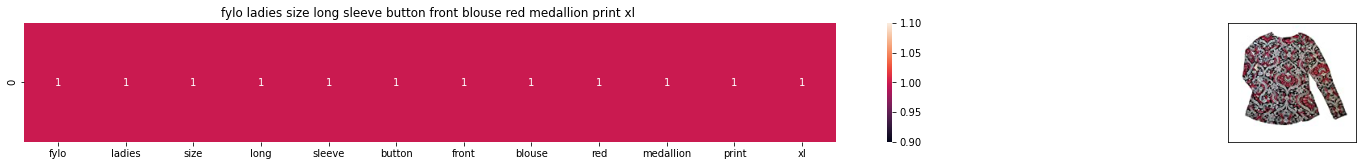

ASIN : B06Y2LZXN5
Brand: Fylo
Title: fylo ladies size long sleeve button front blouse red medallion print xl 
Euclidean similarity with the query image : 0.0


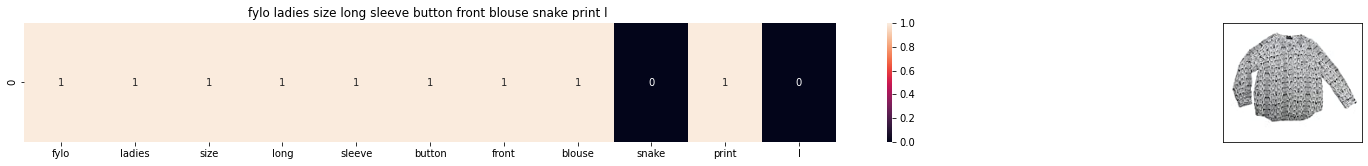

ASIN : B06Y2LY5JK
Brand: Fylo
Title: fylo ladies size long sleeve button front blouse snake print l 
Euclidean similarity with the query image : 2.0


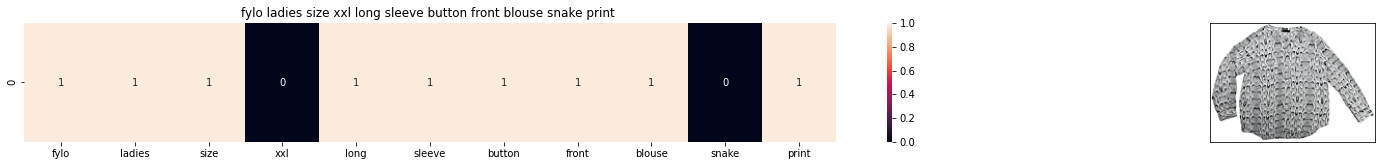

ASIN : B06XCD1PL1
Brand: Fylo
Title: fylo ladies size xxl long sleeve button front blouse snake print 
Euclidean similarity with the query image : 2.23606797749979


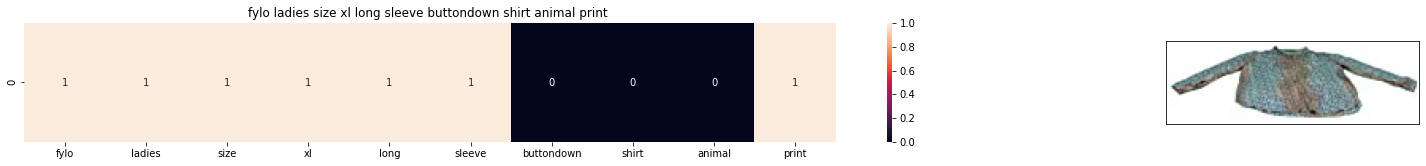

ASIN : B00TR73428
Brand: Fylo
Title: fylo ladies size xl long sleeve buttondown shirt animal print 
Euclidean similarity with the query image : 2.8284271247461903


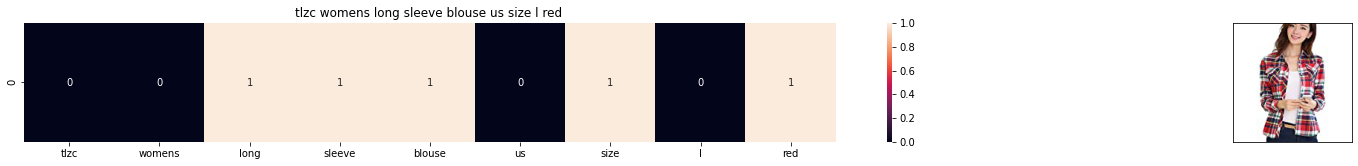

ASIN : B00MCHEJAQ
Brand: TLZC
Title: tlzc womens long sleeve blouse us size l red 
Euclidean similarity with the query image : 3.1622776601683795


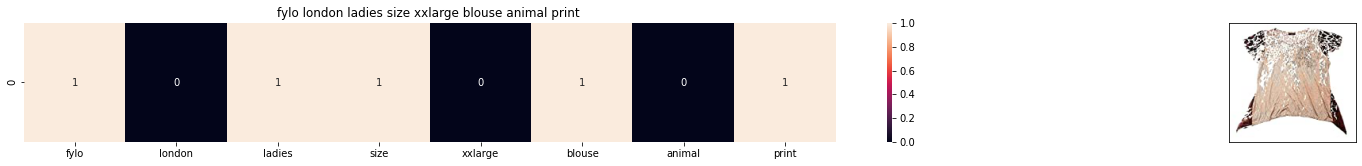

ASIN : B0714MXZY5
Brand: FYLO London
Title: fylo london ladies size xxlarge blouse animal print 
Euclidean similarity with the query image : 3.1622776601683795


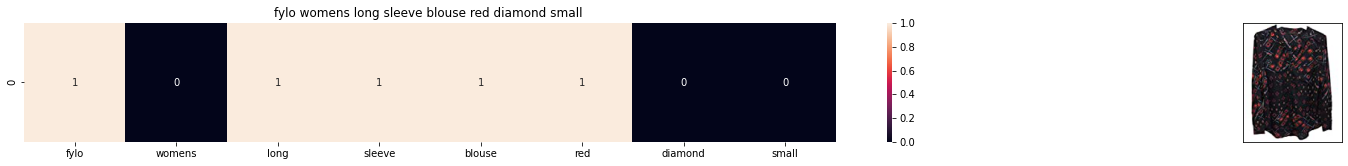

ASIN : B07531SBSJ
Brand: Fylo
Title: fylo womens long sleeve blouse red diamond small 
Euclidean similarity with the query image : 3.1622776601683795


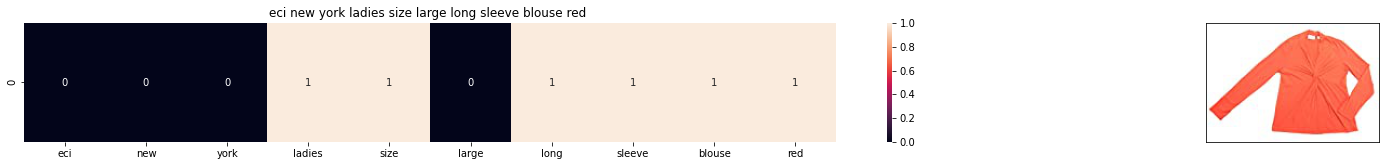

ASIN : B06XRZ182Y
Brand: Eci New York
Title: eci new york ladies size large long sleeve blouse red 
Euclidean similarity with the query image : 3.1622776601683795


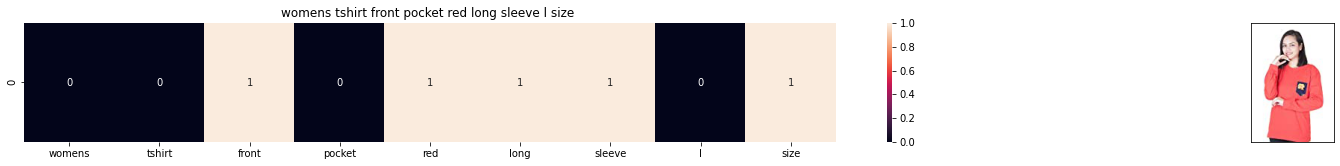

ASIN : B01JR73RWO
Brand: Lofbaz
Title: womens tshirt front pocket red long sleeve l size 
Euclidean similarity with the query image : 3.1622776601683795


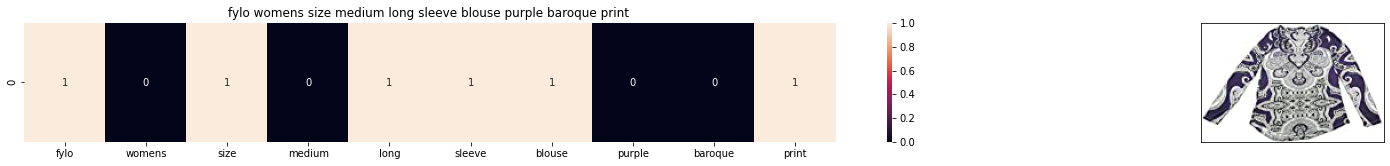

ASIN : B06X6JF5PR
Brand: Fylo
Title: fylo womens size medium long sleeve blouse purple baroque print 
Euclidean similarity with the query image : 3.1622776601683795


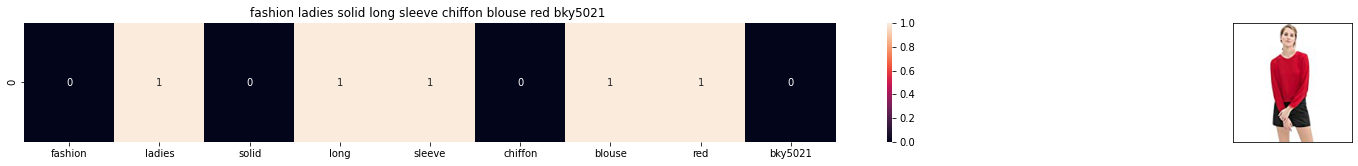

ASIN : B00R06OH4M
Brand: bankhunyabangyai store
Title: fashion ladies solid long sleeve chiffon blouse red bky5021 
Euclidean similarity with the query image : 3.3166247903554


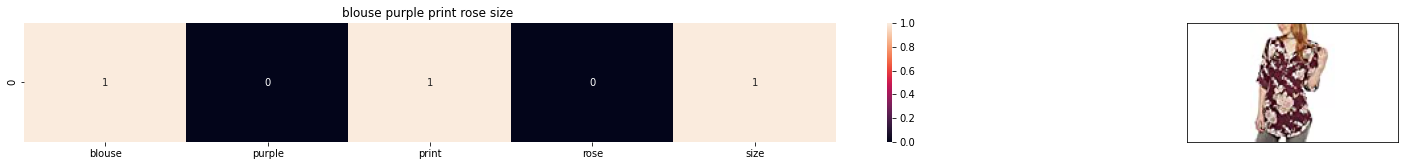

ASIN : B07192KTWT
Brand: Rue 21
Title: blouse purple print rose size 
Euclidean similarity with the query image : 3.3166247903554


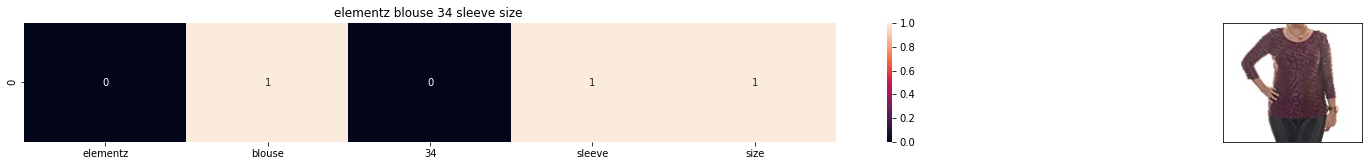

ASIN : B014MYT9J2
Brand: Elementz
Title: elementz blouse 34 sleeve size 
Euclidean similarity with the query image : 3.3166247903554


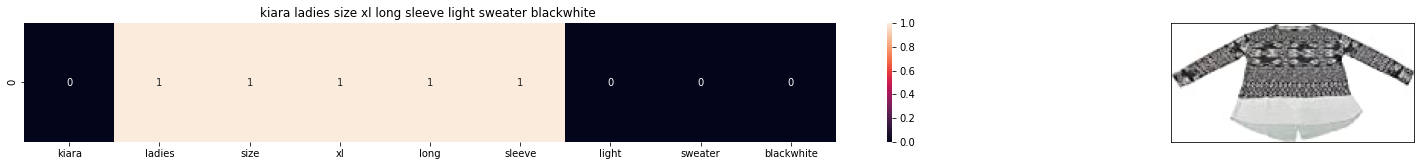

ASIN : B01BN2BLFG
Brand: Kiara
Title: kiara ladies size xl long sleeve light sweater blackwhite 
Euclidean similarity with the query image : 3.3166247903554


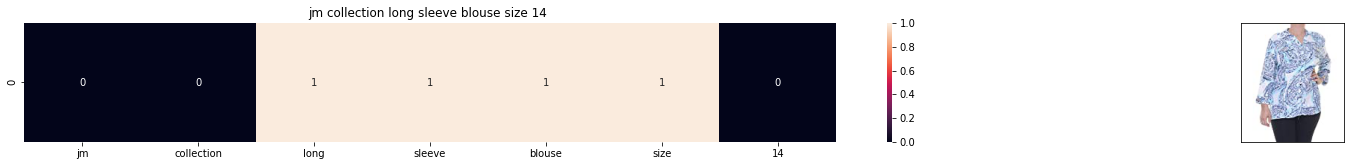

ASIN : B01MY6ZPRE
Brand: JM Collection
Title: jm collection long sleeve blouse size 14 
Euclidean similarity with the query image : 3.3166247903554


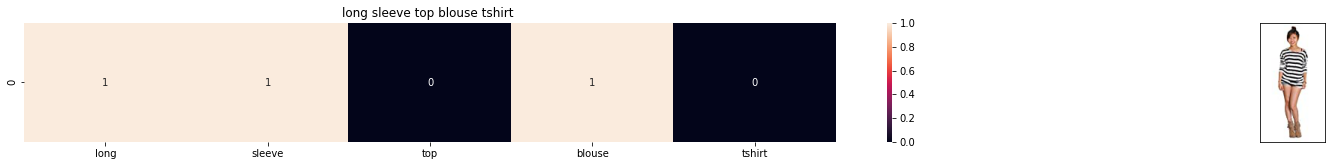

ASIN : B00KF2N5PU
Brand: Vietsbay
Title: long sleeve top blouse tshirt 
Euclidean similarity with the query image : 3.3166247903554


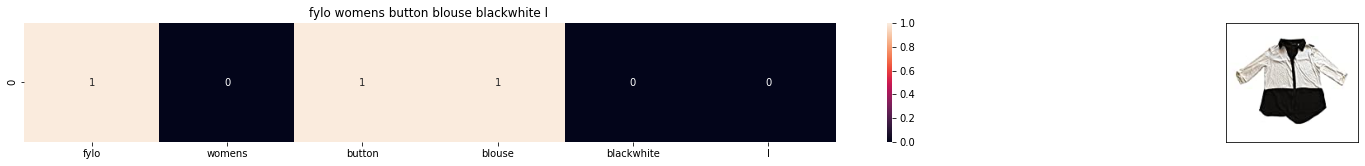

ASIN : B06Y2LBCHM
Brand: Fylo
Title: fylo womens button blouse blackwhite l 
Euclidean similarity with the query image : 3.3166247903554


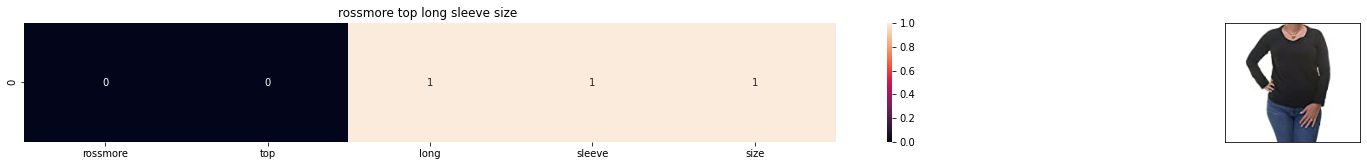

ASIN : B014LKPLYE
Brand: Rossmore
Title: rossmore top long sleeve size 
Euclidean similarity with the query image : 3.3166247903554


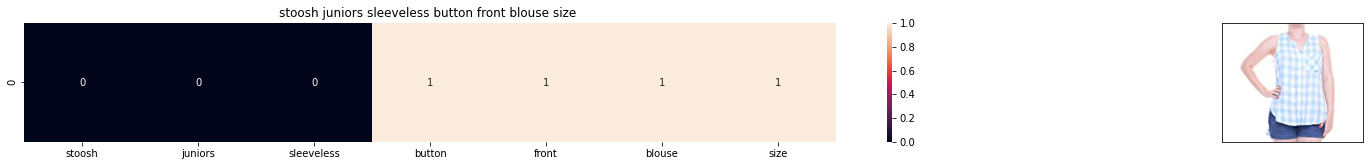

ASIN : B071KQ364H
Brand: Stoosh
Title: stoosh juniors sleeveless button front blouse size 
Euclidean similarity with the query image : 3.3166247903554


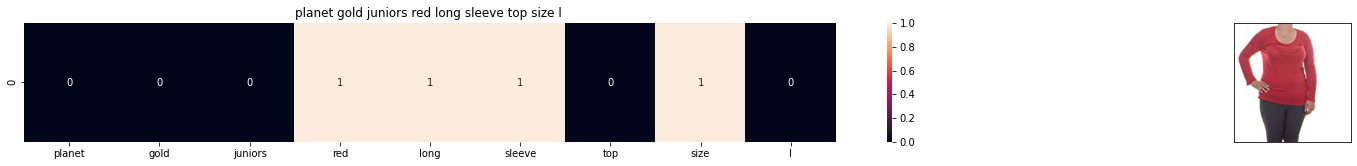

ASIN : B014LNAVE6
Brand: Planet Gold
Title: planet gold juniors red long sleeve top size l 
Euclidean similarity with the query image : 3.4641016151377544


In [ ]:
def bag_of_words_model(doc_id, num_results):
    #doc_id: apparel's id in given corpus...    
    #pairwise_dist will store the distance from given input apparel to all remaining apparels...
    pairwise_dist = pairwise_distances(title_features, title_features[doc_id])
    
    #np.argsort will return indices of the smallest distances...
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    
    #pdists will store the smallest distances...
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        #We will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*80)
bag_of_words_model(12139, 20)
#12111
#12140
#12921
